In [106]:
import matplotlib.pyplot as plt

In [107]:
alpha = 1
beta = 1
gamma = 0.5
delta = 0.5

t_step = 0.2
t_max = 50

x_init = 1
y_init = 0.2

In [108]:
def x_der(x, y):
    return (alpha - beta * y) * x


def y_der(x, y):
    return (-gamma + delta * x) * y

In [109]:
def runge_kutta4(x, y, t):
    k1x = x_der(x, y) * t
    k1y = y_der(x, y) * t
    k2x = x_der(x + k1x/2, y + k1y/2) * t
    k2y = y_der(x + k1x/2, y + k1y/2) * t
    k3x = x_der(x + k2x/2, y + k2y/2) * t
    k3y = y_der(x + k2x/2, y + k2y/2) * t
    k4x = x_der(x + k3x, y + k3y) * t
    k4y = y_der(x + k3x, y + k3y) * t
    return x + (k1x + 2*k2x + 2*k3x + k4x) / 6, y + (k1y + 2*k2y + 2*k3y + k4y) / 6

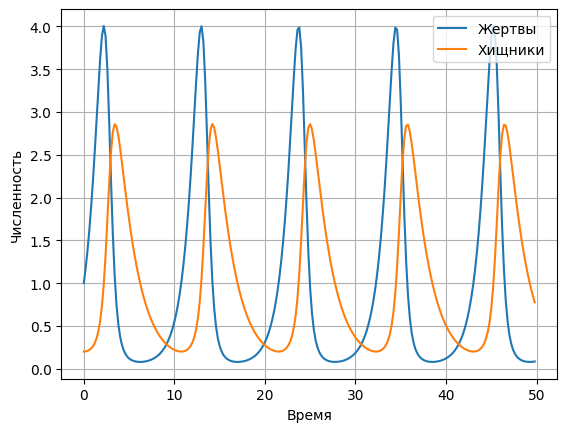

In [110]:
def solver(x_init, y_init):

    x_list = [x_init]
    y_list = [y_init]

    for i in range(num_of_iter - 1):
        temp = runge_kutta4(x_list[i], y_list[i], t_step)
        x_list.append(temp[0])
        y_list.append(temp[1])
    return x_list, y_list

num_of_iter = int(t_max / t_step)
t_list = [i * t_step for i in range(num_of_iter)]
result = solver(1, 0.2)

plt.plot(t_list, result[0], label='Жертвы')
plt.plot(t_list, result[1], label='Хищники')
plt.xlabel('Время')
plt.ylabel('Численность')
plt.grid()
plt.legend()
plt.show()

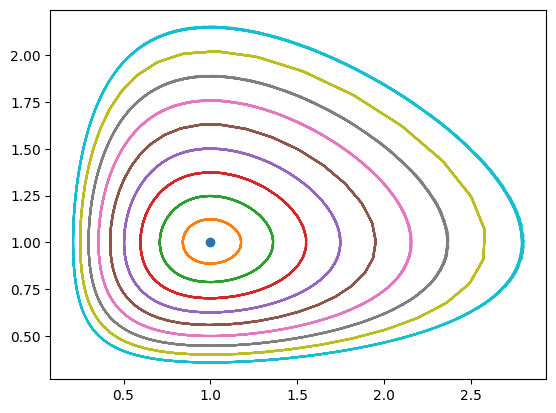

In [111]:
x_init_list = [alpha / beta + i * 0.1 for i in range(10)]
y_init_list = [gamma / delta + i * 0.1 for i in range(10)]

for i in range(len(x_init_list)):
    temp = solver(x_init_list[i], y_init_list[i])
    plt.plot(temp[0], temp[1])

plt.scatter([alpha / beta], [gamma / delta])
plt.show()